# EXPLORACION DE SET.
Exploramos diviendo en  variables categoricas y numericas, Con le objetivo de entender la variable target, Y como es su relacion con resto de variables.


##00-Importacion bibliotecas y set

In [ ]:
import pandas as pd
import requests
from io import StringIO
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Extraccion de df desde google drivee.
file_id = "16ypxCIBr9wSGVEaXqWdZUfz9w4xzccwo"
download_link = f"https://drive.google.com/uc?id={file_id}"
response = requests.get(download_link)
csv_data = StringIO(response.text)
# transformamos en df
df = pd.read_csv(csv_data, encoding='utf-8')

In [ ]:
df.shape

(2666, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

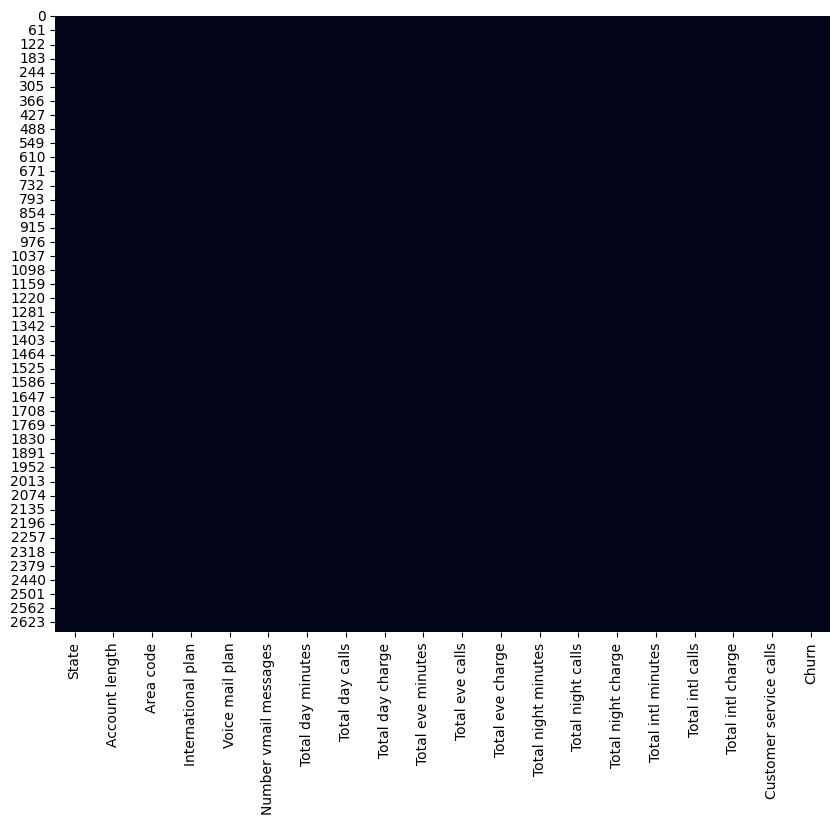

In [ ]:
# Verificamos de forma grafica, la presencia de datos nulos.
plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [ ]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
# Dividimos en grupo categoricos y numericos
num_df=[['Account length','Area code','Number vmail messages','Total day minutes','Total day calls','Total day charge','Total eve minutes','Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls']]
cat_df = df.select_dtypes(include=['object'])

##01-Analisis variables categoricas

In [ ]:
# Filtramos numericas y categoricas
num_df = df.select_dtypes(include=['int64', 'float64'])
cat_df = df.select_dtypes(include=['object','bool'])

In [ ]:
# investigamos cuantia de las etiquetas de las variables categoricas.
for column in cat_df.columns:
    print(cat_df[column].value_counts())

WV    88
MN    70
NY    68
VA    67
AL    66
OH    66
WY    66
OR    62
NV    61
WI    61
MD    60
UT    60
CO    59
CT    59
MI    58
VT    57
ID    56
NC    56
TX    55
FL    54
IN    54
MT    53
OK    52
MA    52
KS    52
MO    51
DE    51
NJ    50
SC    49
SD    49
ME    49
GA    49
RI    48
MS    48
WA    48
AR    47
IL    45
DC    45
AZ    45
NE    45
HI    44
NM    44
ND    44
AK    43
KY    43
NH    43
TN    41
IA    38
PA    36
LA    35
CA    24
Name: State, dtype: int64
No     2396
Yes     270
Name: International plan, dtype: int64
No     1933
Yes     733
Name: Voice mail plan, dtype: int64
False    2278
True      388
Name: Churn, dtype: int64


In [ ]:

for column in cat_df.columns:
    fig= px.pie(cat_df,names=column, title=f'Grafica de {column}')
    fig.update_layout(template='plotly_dark')
    fig.show()

##02-Analisis variables numericas

In [ ]:
# A simple vista, se puede observar que:
# -La gran mayoria son relaciones debiles
# -Presencia de algunas relaciones casi perfectas.
plt.show()

<ipython-input-14-e9421cca70bf>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



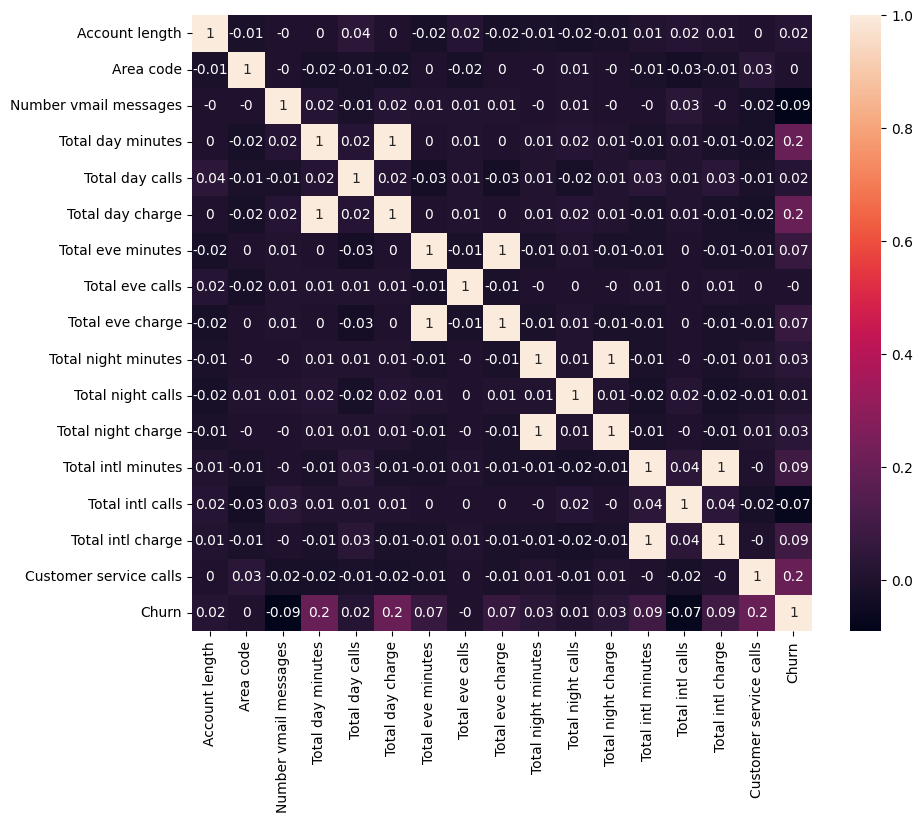

In [ ]:
# Podemos corrobar lo anteriormente dicho con la matriz de correlacion.
plt.figure(figsize=(10, 8))
matriz = df.corr().round(2)
sns.heatmap(data=matriz, annot=True)
plt.show()

In [ ]:
# Histograma agrupado
fig = px.histogram(df, x='Number vmail messages', color="Voice mail plan")
fig.update_layout(width=800)
fig.update_layout(template='plotly_dark')
fig.show()

In [ ]:
fig=px.histogram(df,x='Number vmail messages',color="Voice mail plan",facet_col="Voice mail plan")
fig.update_layout(width=800)
fig.update_layout(template='plotly_dark')
fig.show()

In [ ]:
# scatter
fig=px.scatter(num_df,x='Total day charge',y='Total day minutes')
fig.update_layout(width=800)
fig.update_layout(template='plotly_dark')
fig.show()

In [ ]:
# Se puede ver presencia de outliers en varias variables, y ademas baja varianza relativa en otras.
fig = px.box(num_df,title='Box Plot para Todo el Conjunto de Datos')
fig.update_layout(template='plotly_dark',height=1200) #ajustamos altura
fig.show()

In [ ]:
# Segunda forma en donde se puede aprenciar la alta varianza relativa del algunas variables.
fig = px.scatter(data_frame=num_df, height=800)
fig.update_layout(template='plotly_dark', title='Dispersion de datos para cada variablee', width=1200)
fig.show()

conclusion: Podemso retirar las variables:
- Total day charge
- Total eve charge
- Total night charge
- Tptañ intl charge
Ademas de la que tiene variables categoricas "State"

# CONCLUSION
- Al analizar la matriz de correlación, se observa que la mayoría de las relaciones entre las variables son bastante débiles, con excepción de algunas que muestran un comportamiento directamente correlacionado.
- Al profundizar en esta observación, se destaca que todas las relaciones directas se encuentran entre las variables que terminan con las terminaciones "...charge" y "...minutes". Esto sugiere una relación específica entre estas variables, que podría requerir un análisis más detallado para comprender completamente su naturaleza y su impacto en el conjunto de datos.".